# **Image compression Using kMeans Algorithm**

**Import libraries and Read the image**

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

def read_image():
	img = cv2.imread('/profile.png') # Replace with the actual path to your image

	# Convert the image from BGR to RGB
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



	# Scaling the image so that the values are in the range of 0 to 1
	img = img / 255.0


	return img

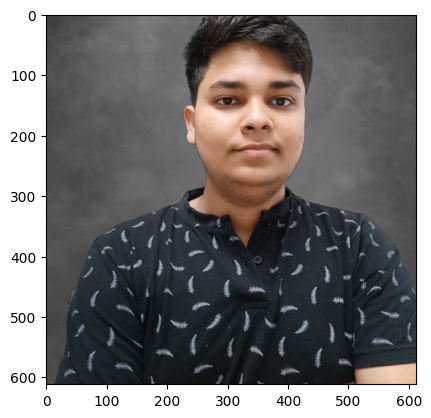

In [50]:
img = mpimg.imread('/profile.png')
imgplot = plt.imshow(img)
plt.show()
A = img

 **Initialize Random Centroid**

In [37]:

def initialize_means(img, clusters):
	# reshaping it or flattening it into a 2d matrix
	points = img.reshape((-1, img.shape[2]))
	m, n = points.shape

	# clusters is the number of clusters
	# or the number of colors that we choose.

	# means is the array of assumed means or centroids.
	means = np.zeros((clusters, n))

	# random initialization of means.
	for i in range(clusters):
		rand_indices = np.random.choice(m, size=10, replace=False)
		means[i] = np.mean(points[rand_indices], axis=0)

	return points, means


In [39]:
# Function- To measure the euclidean distance (distance formula)
def distance(x1, y1, x2, y2):
	dist = np.square(x1 - x2) + np.square(y1 - y2)
	dist = np.sqrt(dist)
	return dist


In [40]:
def k_means(points, means, clusters):
	iterations = 10 # the number of iterations
	m, n = points.shape

	# these are the index values that correspond to the cluster to
	# which each pixel belongs to.
	index = np.zeros(m)

	# k-means algorithm.
	while iterations > 0:
		for j in range(m):
			# initialize minimum value to a large value
			min_dist = float('inf')
			temp = None

			for k in range(clusters):
				x1, y1 = points[j, 0], points[j, 1]
				x2, y2 = means[k, 0], means[k, 1]

				if distance(x1, y1, x2, y2) <= min_dist:
					min_dist = distance(x1, y1, x2, y2)
					temp = k
					index[j] = k

		for k in range(clusters):
			cluster_points = points[index == k]
			if len(cluster_points) > 0:
				means[k] = np.mean(cluster_points, axis=0)

		iterations -= 1

	return means, index


In [41]:
def plot_image(Orginal,Compressed):
    fig,ax = plt.subplots(1,2)
    Img1 = ax[0].imshow(Orginal)
    Img2 = ax[1] .imshow(Compressed)
    for i in range(2):
        title = ["Orginal","Compressed"]
        ax[i].set_title(title[i])

In [53]:
def plot_image(Orginal,Compressed):
    fig,ax = plt.subplots(1,2)
    Img1 = ax[0].imshow(Orginal)
    Img2 = ax[1] .imshow(Compressed)
    for i in range(2):
        title = ["Orginal","Compressed"]
        ax[i].set_title(title[i])

In [56]:
def compress_image(means, index, img):
	# recovering the compressed image by assigning each pixel to its corresponding centroid.
	centroid = np.array(means)
	recovered = centroid[index.astype(int), :]

	# getting back the 3d matrix (row, col, rgb(3))
	recovered = recovered.reshape(img.shape)

	# plotting the compressed image.



	# saving the compressed image.
	cv2.imwrite('compressed_' + str(clusters) + '_colors.png',recovered)
	return recovered # Fixed indentation

Enter the number of colors in the compressed image (default = 16): 16


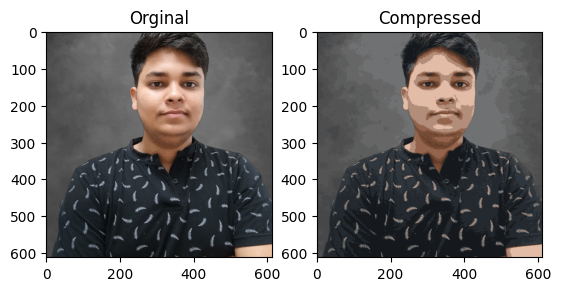

In [57]:
# Driver Code
if __name__ == '__main__':
	img = read_image()

	clusters = 16
	clusters = int(input('Enter the number of colors in the compressed image (default = 16): '))

	points, means = initialize_means(img,clusters)
	means, index = k_means(points, means, clusters)
	compressed = compress_image(means, index, img)

plot_image(img,compressed)
